# Graphs (Matplotlib)

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

=============

[Matplotlib](http://matplotlib.org/) is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Usually we import `matplotlib` as follows:

In [25]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

This allows inline graphics in IPython (Jupyter) notebooks and imports functions nessesary for ploting as `plt`. In addition we import `numpy` as `np`.

Let's prepare some data:

In [35]:
x = np.linspace(0,10,20)
y = x ** 2

Plot is as easy as this:

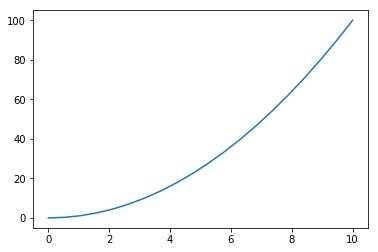

In [36]:
plt.plot(x,y);

Line style and labels are controlled in a way similar to Matlab:

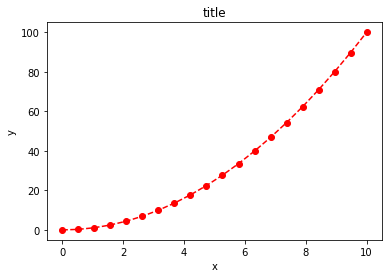

In [37]:
plt.plot(x, y, 'r--o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title');

You can plot several individual lines at once:

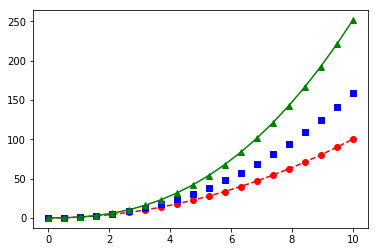

In [38]:
plt.plot(x, y, 'r--o', x, y ** 1.1, 'bs', x, y ** 1.2, 'g^-' );

## Exercise

- plot sine (np.sin())
- plot sine abd cosine on one plot
- make sine thicker (linewidth=5) and sine dashed

### Alternatives

- [Bokeh](http://bokeh.pydata.org/)
- [plot.ly](http://plot.ly)
- [ggplot](http://ggplot.yhathq.com/)

One more example:

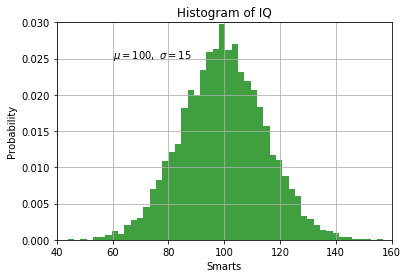

In [39]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

If you feel a bit playful (only in matplotlib > 1.3):

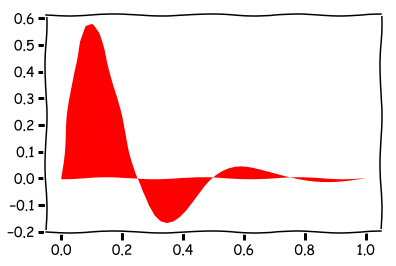

In [40]:
with plt.xkcd():
    x = np.linspace(0, 1)
    y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

    plt.fill(x, y, 'r')
    plt.grid(False)

Following example is from [matplotlib - 2D and 3D plotting in Python](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb) - great place to start for people interested in matplotlib.


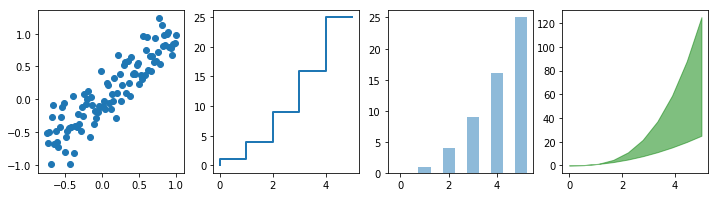

In [41]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)
x = np.linspace(0, 5, 10)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))

axes[1].step(n, n**2, lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

When you going to plot something more or less complicated in Matplotlib, the first thing you do is open the [Matplotlib example gallery](http://matplotlib.org/gallery.html) and choose example closest to your case.

You can directly load python code (or basically any text file) to the notebook. This time we download code from the Matplotlib example gallery:

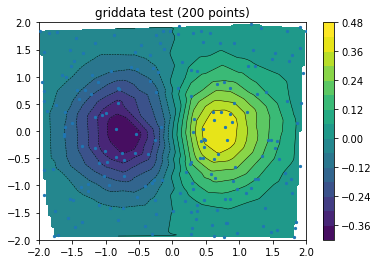

In [44]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/griddata_demo.py
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()
